In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Datasets/iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5648\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [26]:
Species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

data['Species'] = data['Species'].map(Species_map)

In [9]:
data = data.drop(['Id'],axis=1)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

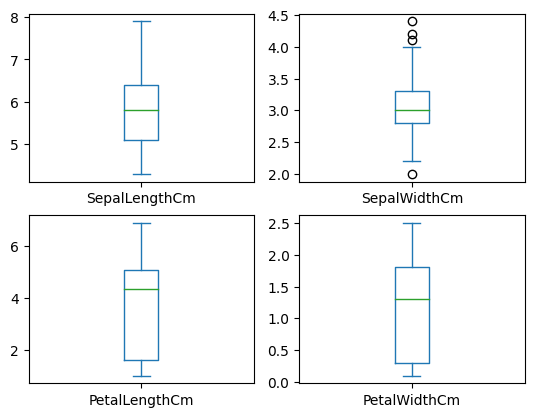

In [12]:
data.plot(kind='box', subplots=True, layout=(2,2))
plt.show()

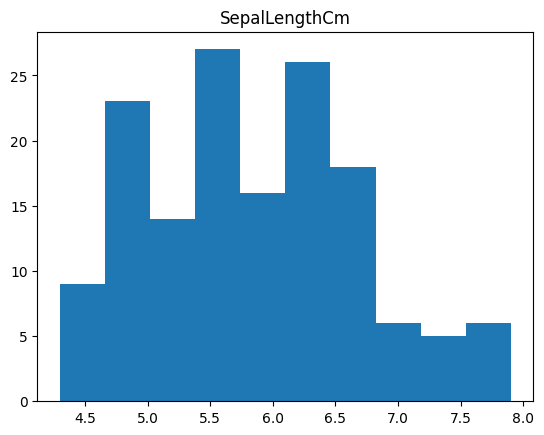

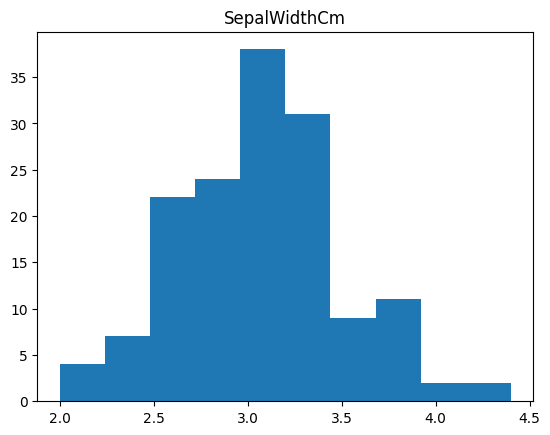

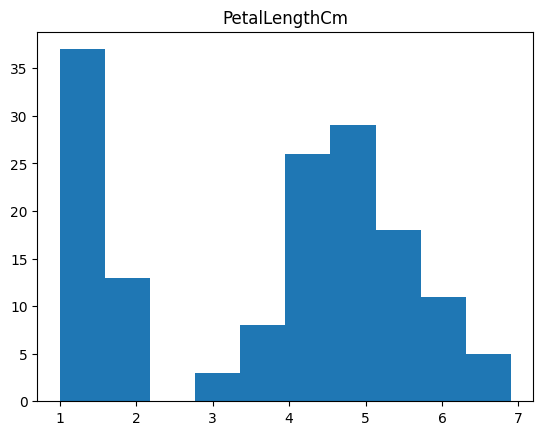

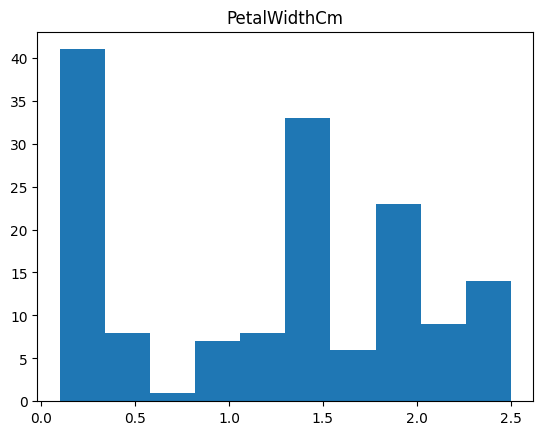

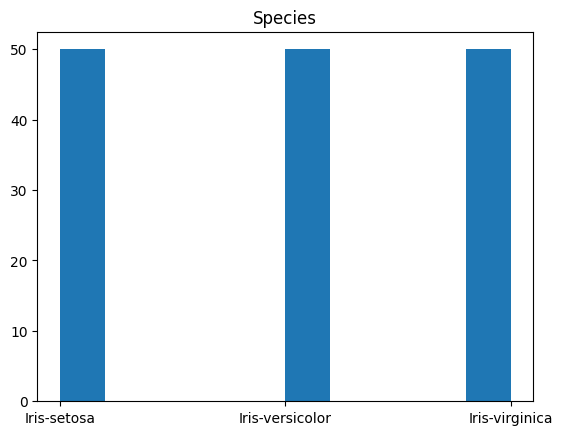

In [13]:
for col in data.columns:
    plt.title(col)
    plt.hist(data[col])
    plt.show()

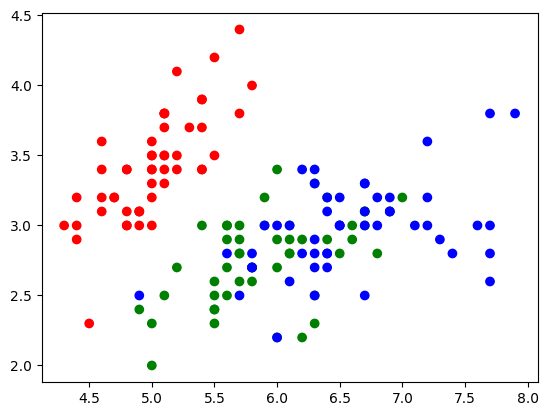

In [14]:
plt.scatter(data=data,x='SepalLengthCm',y='SepalWidthCm', c=data['Species'].map({'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}))
plt.show()

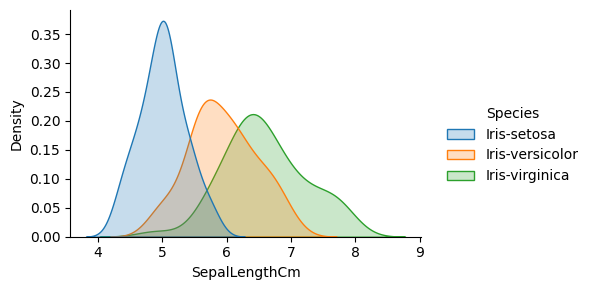

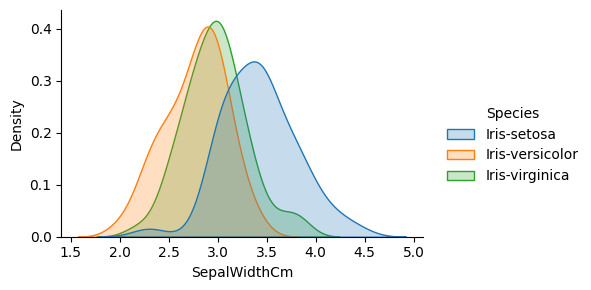

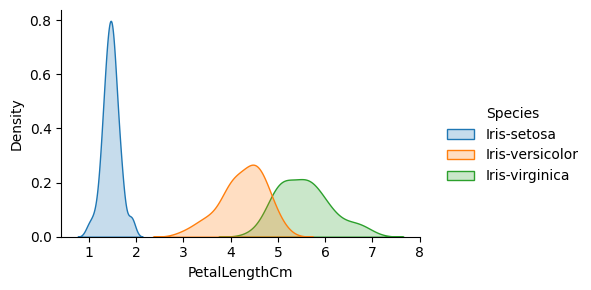

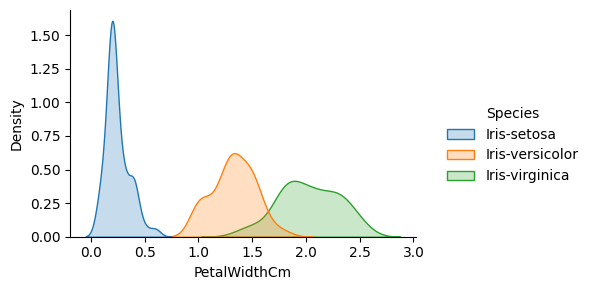

In [15]:
for col in data.columns:
    if col == "Species":
        break
    sns.displot(data, x=data[col], hue="Species", kind="kde", fill=True,  height=3, aspect=1.5)
plt.show()

In [16]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

In [17]:
x=data.iloc[:,0:4].values

In [18]:
# x

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [20]:
import warnings 

warnings.filterwarnings('ignore')

wcss = {'wcss_score':[], 'no_of_clusters':[]}
for i in range(1,11):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(X_scaled)
    wcss['wcss_score'].append(kmeans.inertia_)
    wcss['no_of_clusters'].append(i)
wcss_df = pd.DataFrame(wcss)

wcss_df.head(15)

,wcss_score,no_of_clusters
0,600.000000,1
1,223.732006,2
2,140.965817,3
3,114.682216,4
4,91.191970,5
5,80.193005,6
6,71.300706,7
7,62.452684,8
8,54.310874,9
9,47.616546,10


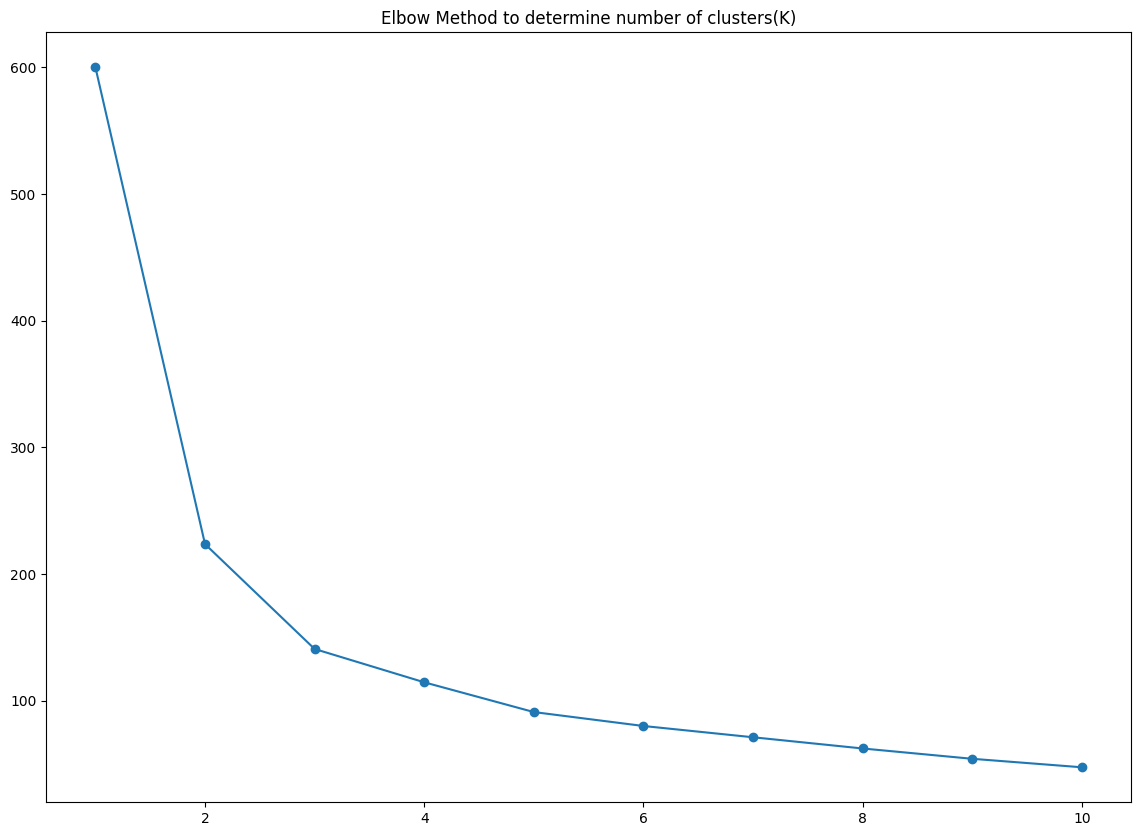

In [21]:
plt.figure(figsize=(14,10))
plt.plot(wcss_df.no_of_clusters, wcss_df.wcss_score, marker='o')
plt.title("Elbow Method to determine number of clusters(K)")
plt.show()

In [22]:
kmeans=KMeans(n_clusters=3,random_state=0) 
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

In [23]:
prediction=kmeans.fit_predict(X_scaled)
prediction

clustered_data = data.copy()
clustered_data["cluster_index"] = prediction

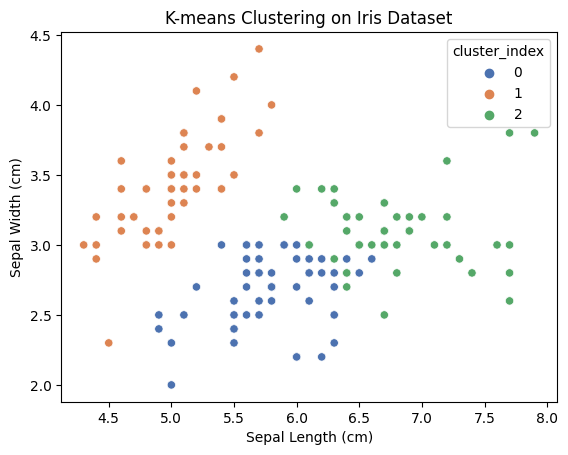

In [24]:
sns.scatterplot(data=clustered_data, 
                x=clustered_data.SepalLengthCm, 
                y=clustered_data.SepalWidthCm, 
                hue=clustered_data.cluster_index, 
                palette='deep')

plt.title('K-means Clustering on Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.show()

In [27]:
score = silhouette_score(data, clustered_data.cluster_index, random_state=0)
print(f"Silhouette score: {score:0.3f}")

Silhouette score: 0.495


In [28]:
agc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [29]:
agg_predict = agc.fit_predict(X_scaled)
score = silhouette_score(X_scaled, agc.labels_, random_state=0)
print(f"Silhouette score: {score:0.3f}")

Silhouette score: 0.446


In [30]:
agg_cluster = data.copy()
agg_cluster["cluster_index"] = agg_predict
agg_cluster.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_index
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

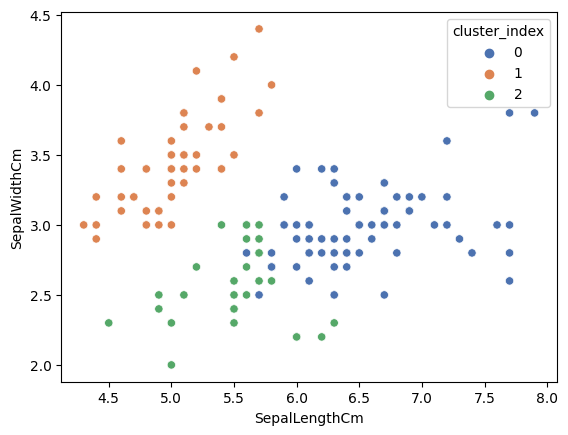

In [31]:
sns.scatterplot(x=clustered_data.SepalLengthCm, 
                y=clustered_data.SepalWidthCm,
                hue=agg_cluster.cluster_index,
                palette="deep")